In [2]:
# mini_llm_section_a_foundations.py

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------
# Step 1: Define Sample Input
# -------------------------------------------
paragraph = "The cat sat on the mat. It was sunny outside."
question = "Where did the cat sit?"

# Combine paragraph and question
text = paragraph + " " + question


In [3]:

# -------------------------------------------
# Step 2: Whitespace Tokenization
# -------------------------------------------
tokens_ws = text.strip().split()
print("Whitespace Tokens:", tokens_ws)


Whitespace Tokens: ['The', 'cat', 'sat', 'on', 'the', 'mat.', 'It', 'was', 'sunny', 'outside.', 'Where', 'did', 'the', 'cat', 'sit?']


In [4]:

# -------------------------------------------
# Step 3: Simulated BPE Tokenization (very simplified)
# Split words into subwords: e.g., "outside" → "out", "side"
def simulate_bpe(tokens):
    bpe_vocab = ["the", "cat", "sat", "on", "mat", "it", "was", "sun", "sunny", "out", "side", ".", "?", "where", "did"]
    subword_tokens = []
    for token in tokens:
        token_lower = token.lower()
        found = False
        for sub in bpe_vocab:
            if token_lower.startswith(sub):
                subword_tokens.append(sub)
                remaining = token_lower[len(sub):]
                if remaining and remaining in bpe_vocab:
                    subword_tokens.append(remaining)
                found = True
                break
        if not found:
            subword_tokens.append(token_lower)
    return subword_tokens

tokens_bpe = simulate_bpe(tokens_ws)
print("Subword Tokens (Simulated BPE):", tokens_bpe)



Subword Tokens (Simulated BPE): ['the', 'cat', 'sat', 'on', 'the', 'mat', '.', 'it', 'was', 'sun', 'out', 'where', 'did', 'the', 'cat', 'sit?']


In [5]:
# -------------------------------------------
# Step 4: Token to ID Mapping
# -------------------------------------------
unique_tokens = sorted(set(tokens_bpe))
token_to_id = {tok: idx for idx, tok in enumerate(unique_tokens)}
id_to_token = {idx: tok for tok, idx in token_to_id.items()}
token_ids = [token_to_id[tok] for tok in tokens_bpe]

print("Token → ID Map:", token_to_id)
print("Token IDs:", token_ids)



Token → ID Map: {'.': 0, 'cat': 1, 'did': 2, 'it': 3, 'mat': 4, 'on': 5, 'out': 6, 'sat': 7, 'sit?': 8, 'sun': 9, 'the': 10, 'was': 11, 'where': 12}
Token IDs: [10, 1, 7, 5, 10, 4, 0, 3, 11, 9, 6, 12, 2, 10, 1, 8]


In [6]:
# -------------------------------------------
# Step 5: One-Hot Encoding
# -------------------------------------------
vocab_size = len(unique_tokens)
one_hot_vectors = np.eye(vocab_size)[token_ids]

print("One-hot shape:", one_hot_vectors.shape)



One-hot shape: (16, 13)


C:\Users\suyog\AppData\Local\Temp\ipykernel_30944\2027005161.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


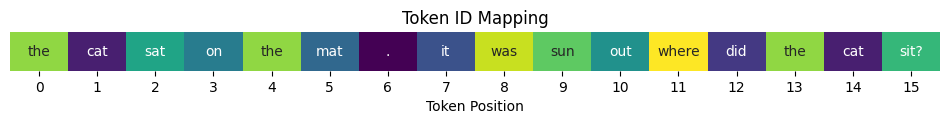

In [7]:
# -------------------------------------------
# Step 6: 🔍 Visualize Token IDs as Heatmap
# -------------------------------------------
plt.figure(figsize=(12, 0.5))
sns.heatmap([token_ids], annot=[tokens_bpe], fmt="", cmap="viridis", cbar=False)
plt.title("Token ID Mapping")
plt.xlabel("Token Position")
plt.yticks([])
plt.tight_layout()
plt.show()



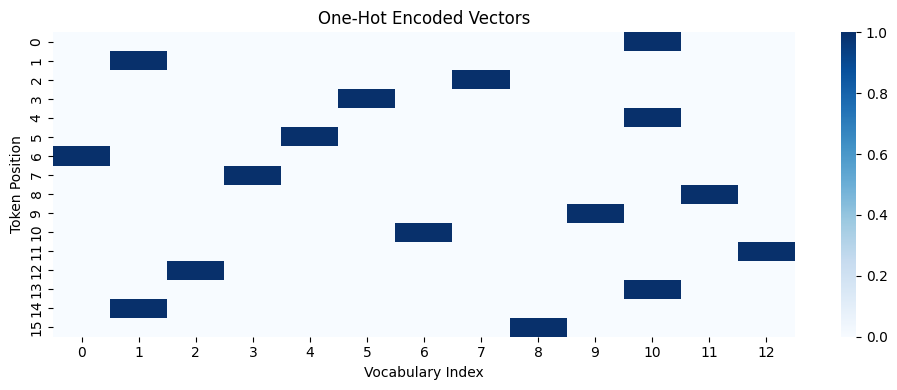

In [10]:
# -------------------------------------------
# Step 7: 🔍 Visualize One-Hot Vectors as Heatmap
# -------------------------------------------
plt.figure(figsize=(10, 4))
sns.heatmap(one_hot_vectors, annot=False, cmap="Blues", cbar=True)
plt.title("One-Hot Encoded Vectors")
plt.xlabel("Vocabulary Index")
plt.ylabel("Token Position")
plt.tight_layout()
plt.show()
# -------------------------------------------

In [9]:
# -------------------------------------------
# Summary
# -------------------------------------------
print(f"\n✅ Completed Section A: Foundations")
print(f"Total Tokens: {len(tokens_bpe)}, Vocabulary Size: {vocab_size}")



✅ Completed Section A: Foundations
Total Tokens: 16, Vocabulary Size: 13
